In [1]:
!pip install category_encoders -q

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score, classification_report

In [3]:

!pip install category_encoders
!pip install association-metrics
!pip install scikit-learn
!pip install lightgbm
!pip install xgboost
!pip install catboost
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import catboost
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split,RandomizedSearchCV
from sklearn.svm  import LinearSVC
from sklearn.svm import SVC
from category_encoders import CatBoostEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import shap
shap.initjs()

In [5]:
!gdown 1B6J60qNWt1vERdHgS7pIrgpjaxHEH9sd

Downloading...
From: https://drive.google.com/uc?id=1B6J60qNWt1vERdHgS7pIrgpjaxHEH9sd
To: /content/clients.csv
100% 18.3M/18.3M [00:00<00:00, 111MB/s] 


In [6]:
df = pd.read_csv('/content/clients.csv')

# Описание датасета


## Клиенты авиакомпании
Датасет содержит информацию о клиентах некоторой авиакомпании.

_Целевая переменная_ (таргет) – `satisfaction` (удовлетворенность клиента полетом), бинарная (_satisfied_ или _neutral or dissatisfied_)

### Признаки
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)

Признаки, перечисленные ниже, являются числовыми. По смыслу они категориальные: клиент ставил оценку от 1-го до 5-ти включительно. Есть выбросы!
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [7]:
df.head(10)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
5,6,Male,43.0,Loyal Customer,Business travel,Business,3788.0,0.0,0.0,4.0,...,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,satisfied
6,7,Male,43.0,Loyal Customer,Business travel,Business,1963.0,0.0,0.0,3.0,...,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,satisfied
7,8,Female,60.0,Loyal Customer,Business travel,Business,853.0,0.0,3.0,4.0,...,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,satisfied
8,9,Male,50.0,Loyal Customer,Business travel,Business,2607.0,0.0,0.0,4.0,...,2.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,neutral or dissatisfied
9,10,Female,38.0,Loyal Customer,Business travel,Business,2822.0,13.0,0.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied


## Исследование данных

Размер датасета

In [8]:
df.shape

(129880, 24)

Информация о типах данных и пропусках

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

Основные числовые характеристики

In [10]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


Нечисловые признаки:

In [11]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


## Однофакторный анализ

## satisfaction

In [12]:
df['satisfaction'].describe()

count                      129880
unique                          3
top       neutral or dissatisfied
freq                        58879
Name: satisfaction, dtype: object

У нас 3 типа оценки удовлетворенности полетом. Наиболее популярна нейтральный или неудовлетворенный.

In [13]:
df['satisfaction'].value_counts(dropna=False)

neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: satisfaction, dtype: int64

Всего 3 типа значений в целевой переменной: neutral or dissatisfied(нейтральный или неудовлетворенный), satisfied(удовлетворен) и не проставленная оценка -.
Удалим строки без указания таргета.

In [14]:
df = df[df.satisfaction!='-']
df['satisfaction'].value_counts(dropna=False)

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Все отлично Бинарная задача.

Посмотрим на распределение оценок

<Axes: xlabel='satisfaction', ylabel='Count'>

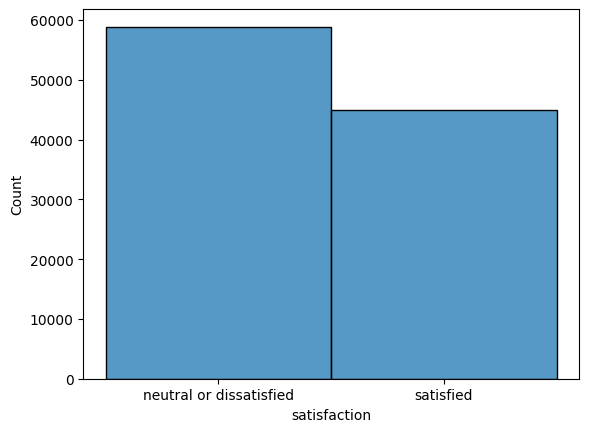

In [15]:
sns.histplot(df['satisfaction'])

## Age возраст

Посмотрим на распределение клиентов по возрасту

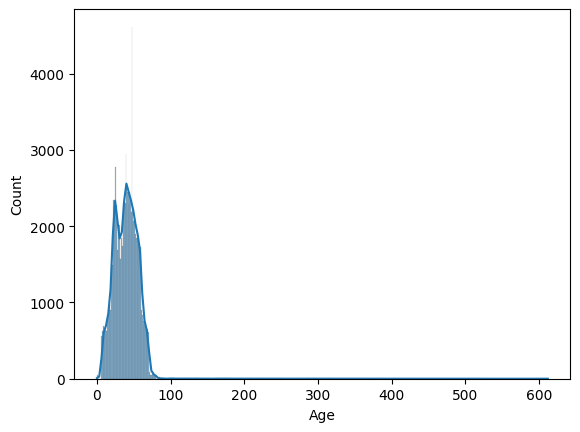

In [16]:
sns.histplot(df['Age'], kde=True)
plt.show()

Люди, конечно, живвут и долго, но тут мы видим явные выбросы. Посмотрим на boxplot.

<Axes: xlabel='Age'>

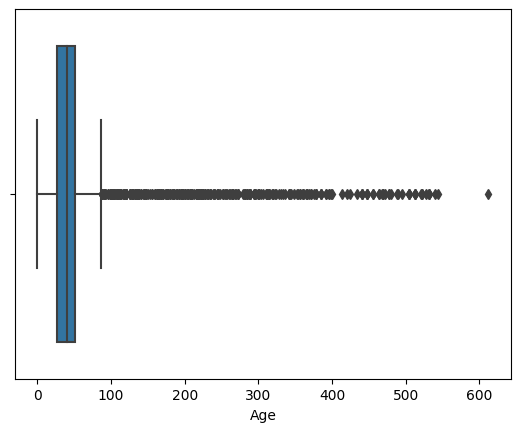

In [17]:
sns.boxplot(data=df, x="Age")

Посмотрим на строки с возрастом более 100 лет.

In [18]:
df.shape

(103904, 24)

In [19]:
df[df.Age>90]

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
28,29,Male,320.0,Loyal Customer,Business travel,Business,3734.0,0.0,52.0,4.0,...,4.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,satisfied
769,770,Male,300.0,NaN,Business travel,Business,2883.0,0.0,0.0,1.0,...,2.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,neutral or dissatisfied
1313,1314,Male,272.0,Loyal Customer,Business travel,Business,247.0,0.0,0.0,0.0,...,5.0,5.0,3.0,3.0,1.0,1.0,4.0,3.0,5.0,satisfied
1524,1525,Female,210.0,Loyal Customer,Business travel,Business,1740.0,0.0,0.0,4.0,...,5.0,5.0,2.0,2.0,2.0,2.0,5.0,2.0,4.0,satisfied
1906,1907,Female,522.0,Loyal Customer,Business travel,Business,2116.0,9.0,11.0,4.0,...,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128411,128412,Male,104.0,Loyal Customer,Business travel,Business,647.0,4.0,0.0,1.0,...,1.0,1.0,1.0,1.0,5.0,4.0,1.0,4.0,1.0,neutral or dissatisfied
128921,128922,Female,208.0,Loyal Customer,Business travel,Business,236.0,45.0,37.0,4.0,...,4.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
129457,129458,Male,448.0,Loyal Customer,Business travel,Business,2764.0,0.0,0.0,3.0,...,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,satisfied
129638,129639,Male,144.0,Loyal Customer,Business travel,Business,337.0,0.0,0.0,1.0,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,satisfied


Таких строк 339. Посмотрим на значения возрастов, указанных ошибочно.

In [20]:
df[df.Age>90].Age.value_counts()

100.0    12
216.0     9
120.0     7
220.0     7
168.0     6
         ..
155.0     1
188.0     1
287.0     1
352.0     1
171.0     1
Name: Age, Length: 167, dtype: int64

Вряд ли нам удастся восстновиь картину по таким строкам. Удалим строки с значениями боллее 100 лет.

In [21]:
df = df[df.Age<=90]

Повторно посмотрим на распределение клиентов по возрасту.

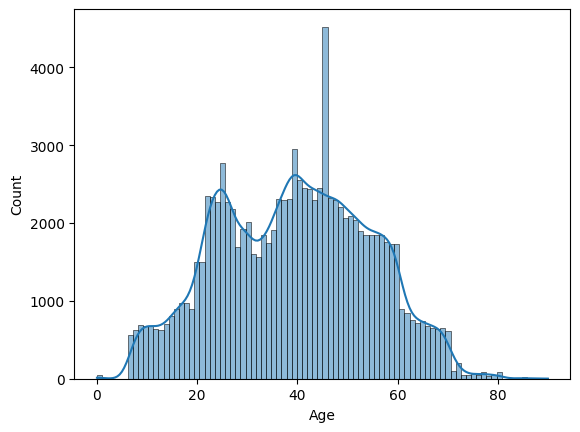

In [22]:
sns.histplot(df['Age'], kde=True)
plt.show()

## Gender

In [23]:
df['Gender'].value_counts(dropna=False)

Female    52296
Male      50748
NaN         260
Name: Gender, dtype: int64

Посмотрим на поцентное соотношение..

In [24]:
df['Gender'].value_counts(dropna=False, normalize=True)

Female    0.506234
Male      0.491249
NaN       0.002517
Name: Gender, dtype: float64

Такие строки удалим.

In [25]:
df['Gender'].fillna("unknown", inplace=True)
df = df[df.Gender!='unknown']

In [26]:
df['Gender'].value_counts(dropna=False)

Female    52296
Male      50748
Name: Gender, dtype: int64

Визуализируем связь среднего возраста в зависимости от пола. На гистограмме изображены для каждой категории:

средний возраст
доверительный интервал для среднего с вероятностью 95%

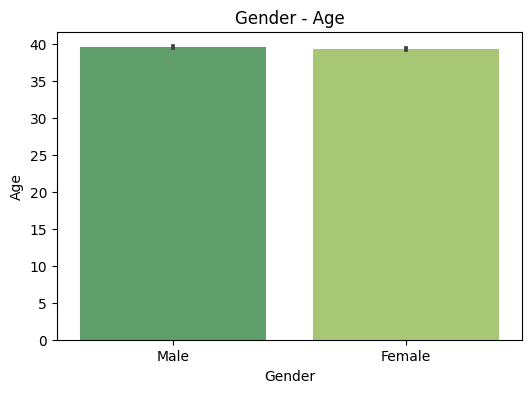

In [27]:
plt.figure(figsize=(6,4))

sns.barplot(x='Gender', y='Age', data = df, palette='summer')
plt.title('Gender - Age')
plt.show()

Средний возраст очень похож и у мужчин и у женщин.

## Class класс

Посмотрим на типы классов, которыми летали клиенты.

In [28]:
df.Class.value_counts()

Business    49204
Eco         46327
Eco Plus     7424
Name: Class, dtype: int64

Посмотрим гистограмму по классу

<Axes: xlabel='Class', ylabel='count'>

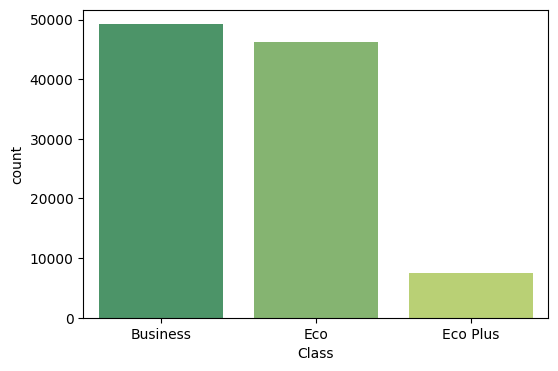

In [29]:
plt.figure(figsize=(6,4))

sns.countplot(x='Class', data = df, palette='summer')

Визуализируем связь возраст от пола. На гистограмме изображены для каждой категории:

средний возраст
доверительный интервал для среднего с вероятностью 95%

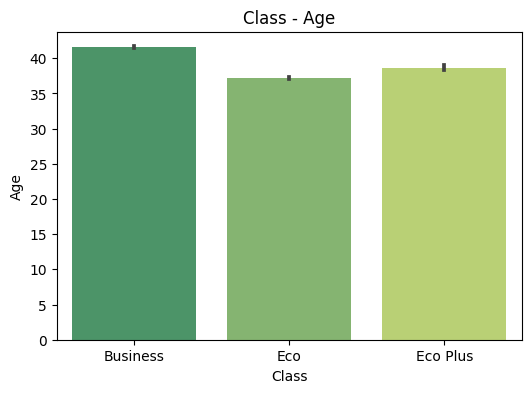

In [30]:
plt.figure(figsize=(6,4))

sns.barplot(x='Class', y='Age', data = df, palette='summer')
plt.title('Class - Age')
plt.show()

Выходит, что средний вораст у клиентов бизнес класса немного выше чем в эко и категрии эко плюс.

## Customer Type

Посмотрим какие типы клиентов есть в выборке.

In [31]:
df['Customer Type'].value_counts()

Loyal Customer       84178
disloyal Customer    18803
Name: Customer Type, dtype: int64

Значения два: лояльный и нелояльный клиент.

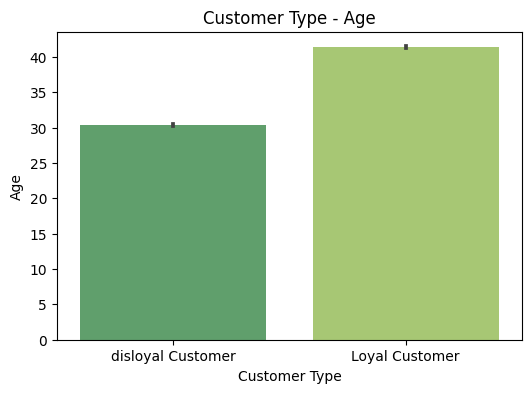

In [32]:
plt.figure(figsize=(6,4))

sns.barplot(x='Customer Type', y='Age', data = df, palette='summer')
plt.title('Customer Type - Age')
plt.show()

Средний возраст лояльных клиентов значительно выше нелояльных.

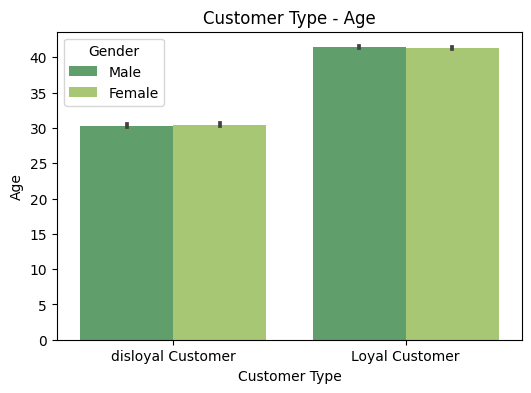

In [33]:
plt.figure(figsize=(6,4))

sns.barplot(x='Customer Type', y='Age', hue='Gender', data = df, palette='summer')
plt.title('Customer Type - Age')
plt.show()

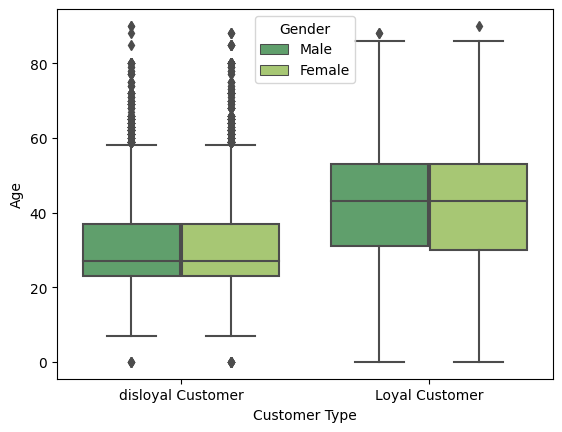

In [34]:
sns.boxplot(x="Customer Type", y="Age", data=df, hue="Gender", palette='summer')
plt.show()

## Type of Travel

Посмотрим на значения в Type of Travel.

In [35]:
df['Type of Travel'].value_counts()

Business travel    70989
Personal Travel    31968
Name: Type of Travel, dtype: int64

Всего 2 типа: бизнес-поездки и персональные.

Построем гистограмму по типу поездок.

<Axes: xlabel='Type of Travel', ylabel='count'>

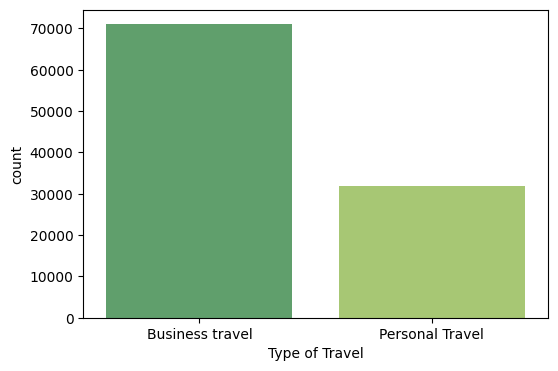

In [36]:
plt.figure(figsize=(6,4))

sns.countplot(x='Type of Travel', data = df, palette='summer')

Интересно посмотреть, тип путешествия связан с полом и классом.

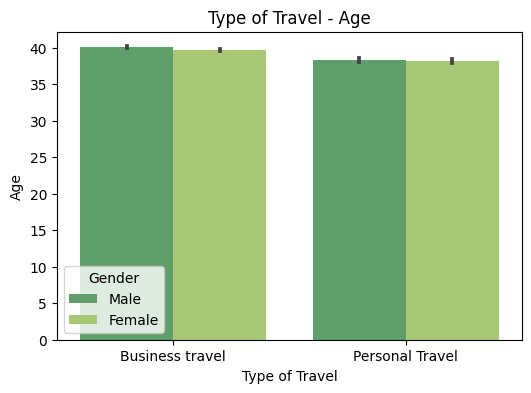

In [37]:
plt.figure(figsize=(6,4))

sns.barplot(x='Type of Travel', y='Age', hue='Gender', data = df, palette='summer')
plt.title('Type of Travel - Age')
plt.show()

Средний возраст в бизнес поездках несколько выше возраста людей по персональным поздкам.

## Flight Distance

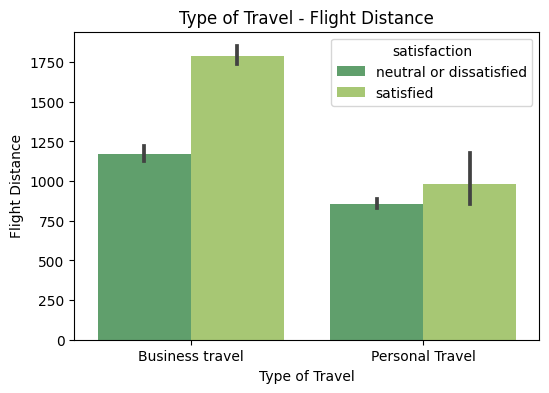

In [38]:
plt.figure(figsize=(6,4))

sns.barplot(x='Type of Travel', y='Flight Distance', hue='satisfaction', data = df, palette='summer')
plt.title('Type of Travel - Flight Distance')
plt.show()

Среняя длительность бизнес поездок значительно выше средней длительноти персональных поездок.

## Departure Delay in Minutes

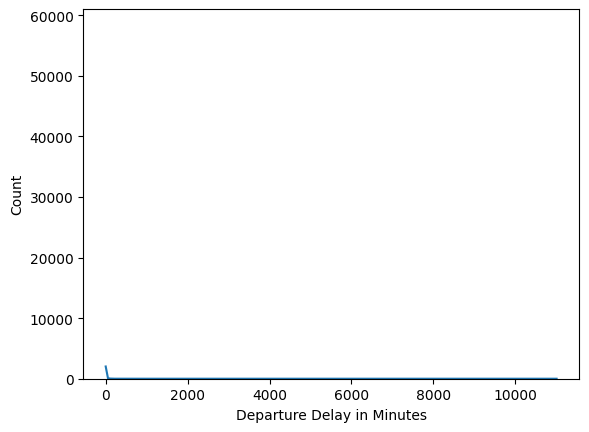

In [39]:
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.show()

Посмотрим на boxplot

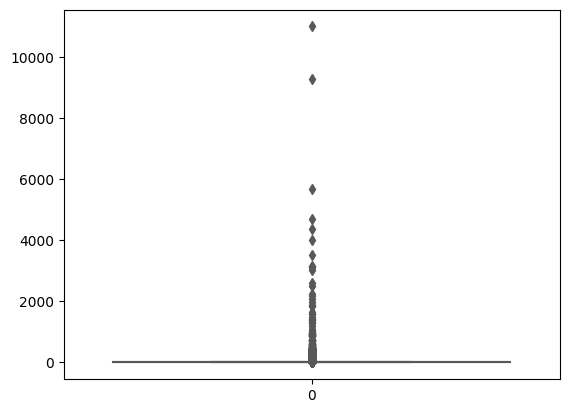

In [40]:
sns.boxplot(df['Departure Delay in Minutes'], palette='summer')
plt.show()

Тут явные выбросы.

In [41]:
len(df)

103044

In [42]:
len(df[df['Departure Delay in Minutes']>200])

824

In [43]:
df = df[df['Departure Delay in Minutes']<=200]
len(df)

102136

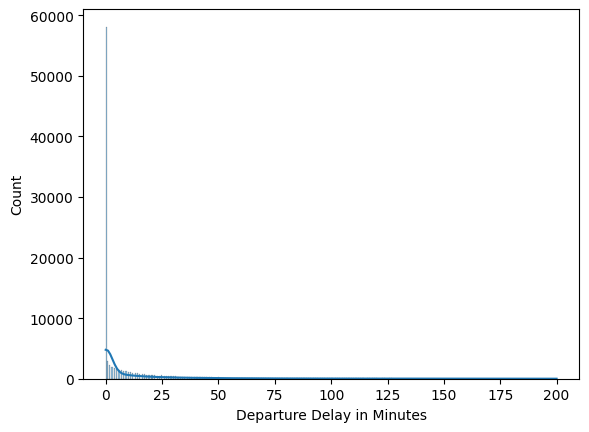

In [44]:
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.show()

Машинное обучение. Предсказание успешной сдачи экзамена по writing

In [45]:
df.columns

Index(['id', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction'],
      dtype='object')

## Arrival Delay in Minutes

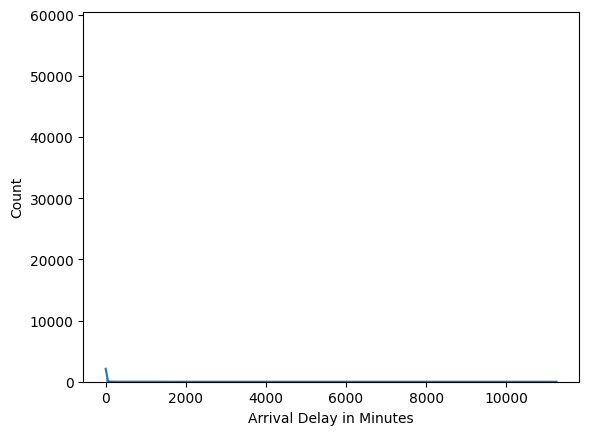

In [46]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.show()

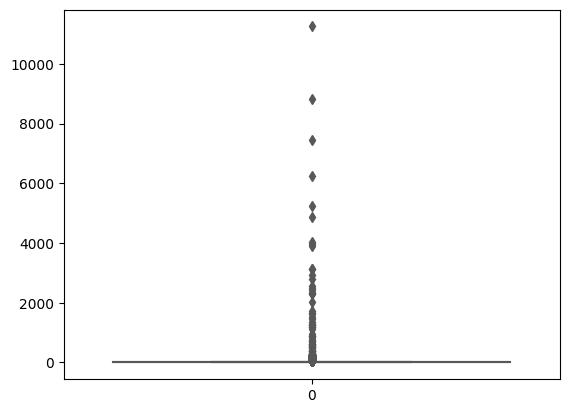

In [47]:
sns.boxplot(df['Arrival Delay in Minutes'], palette='summer')
plt.show()

Тут явные выбросы.

In [48]:
len(df)

102136

In [49]:
len(df[df['Arrival Delay in Minutes']>75])/len(df)

0.04672201770188768

In [50]:
df = df[df['Arrival Delay in Minutes']<=75]

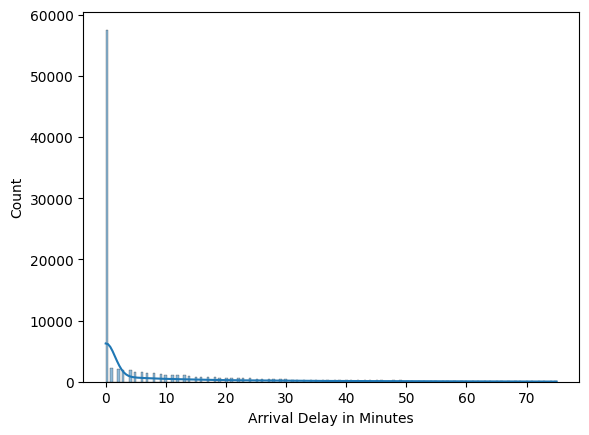

In [51]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True)
plt.show()

## Inflight wifi service (categorical, int): оценка клиентом интернета на борту

In [52]:
df['Inflight wifi service'].value_counts()

2.0     24024
3.0     24022
4.0     18500
1.0     16598
5.0     10820
0.0      2950
6.0         5
7.0         3
21.0        3
12.0        2
40.0        2
25.0        1
10.0        1
45.0        1
16.0        1
28.0        1
18.0        1
20.0        1
15.0        1
Name: Inflight wifi service, dtype: int64

Есть данные, где оценка явно не в шкале до 5. В оценке 20 может быть опечатка и имелось ввиду 2. А может быть, клиент был очень доволен и это все 5. Лучше удалим значения, где оценка выше 5.

In [53]:
len(df[df['Inflight wifi service']<=5])/len(df)

0.9994328084233105

Данных мы не теряем практически.

In [54]:
df = df[df['Inflight wifi service']<=5]

## Departure/Arrival time convenient (categorical, int): оценка клиентом удобство времени прилета и вылета

In [55]:
df['Departure/Arrival time convenient'].value_counts()

4.0     23809
5.0     20959
3.0     16696
2.0     15944
1.0     14440
0.0      4997
12.0        4
9.0         4
8.0         4
30.0        3
6.0         3
20.0        2
14.0        2
35.0        1
32.0        1
7.0         1
45.0        1
16.0        1
24.0        1
27.0        1
10.0        1
Name: Departure/Arrival time convenient, dtype: int64

Аналогичная ситуация.

In [56]:
len(df[df['Departure/Arrival time convenient']<=5])/len(df)

0.999288028561405

In [57]:
df = df[df['Departure/Arrival time convenient']<=5]

In [58]:
df.columns

Index(['id', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction'],
      dtype='object')

In [59]:
df[['Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']].describe()

,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,96815.000000,96817.000000,96815.000000,96810.000000,96809.000000,96806.000000,96815.000000,96811.000000,96817.000000,96812.000000,96802.000000,96814.000000
mean,2.762175,2.979601,3.212250,3.258568,3.449576,3.366320,3.394763,3.352976,3.636211,3.312482,3.658261,3.292107
std,1.425595,1.302348,1.353148,1.387258,1.345561,1.355149,1.335593,1.370925,1.222947,1.301724,1.206613,1.345499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,45.000000,36.000000,45.000000,40.000000,45.000000,40.000000,45.000000,40.000000,40.000000,45.000000,36.000000,45.000000


In [60]:
len(df)

96845

Оценки должны быть в шкале до 5. Остальное ошибки, опечатки или несистемная ошибка.

In [61]:
columns = ['Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for col in columns:
    df = df[df[col]<=5]

In [62]:
len(df)

96158

In [63]:
df[['Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']].describe()

,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,96158.000000,96158.000000,96158.000000,96158.000000,96158.000000,96158.000000,96158.000000,96158.000000,96158.000000,96158.000000,96158.000000,96158.000000
mean,2.758512,2.976393,3.208885,3.253541,3.446110,3.363797,3.389786,3.346773,3.632605,3.307879,3.653903,3.288265
std,1.400801,1.278507,1.328366,1.349994,1.317912,1.333902,1.286652,1.318912,1.183220,1.263361,1.171770,1.311395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Отлично. Все оценки в шкале от 0 до 5.

In [64]:
df.columns

Index(['id', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction'],
      dtype='object')

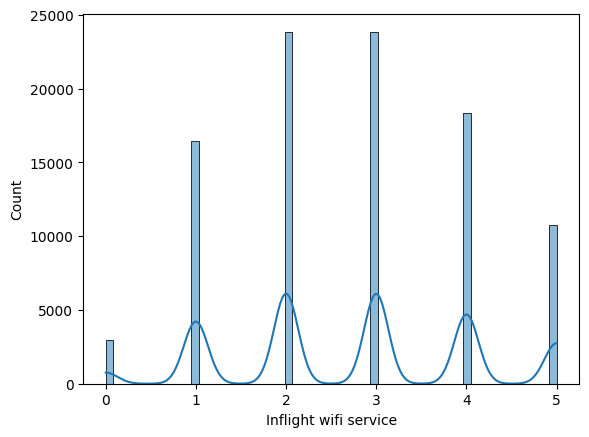

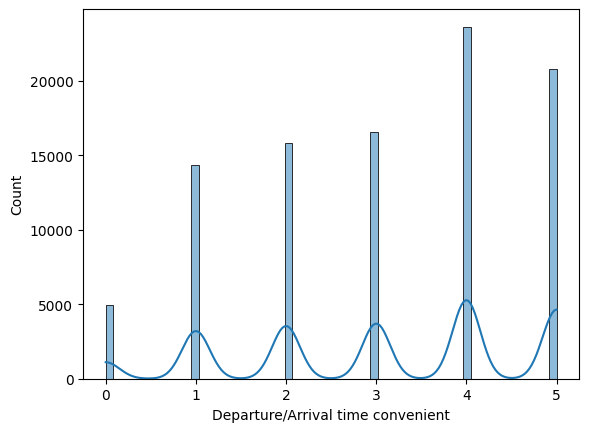

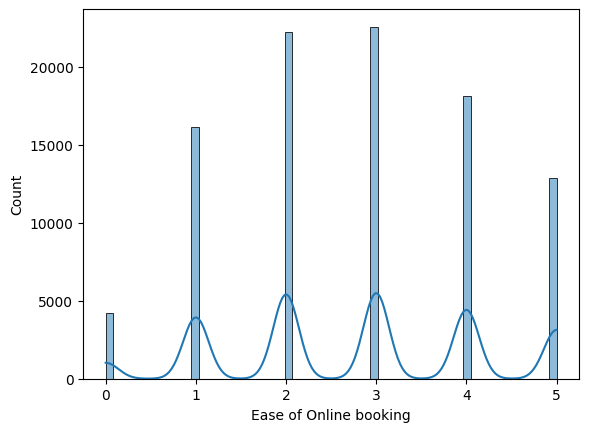

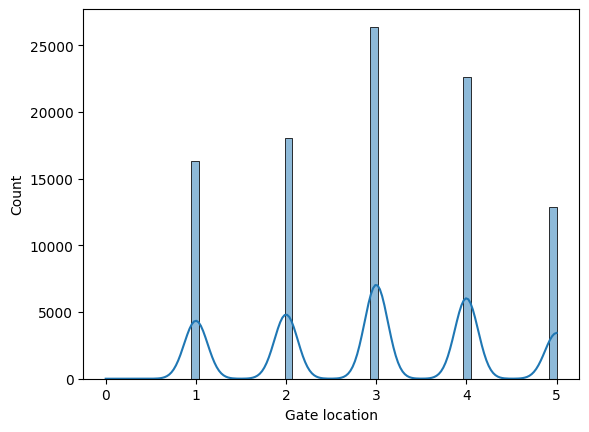

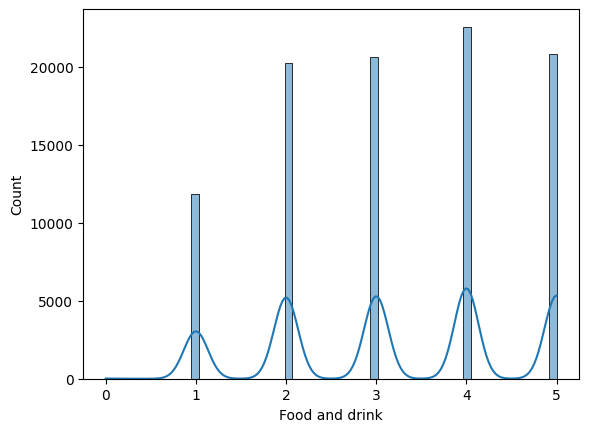

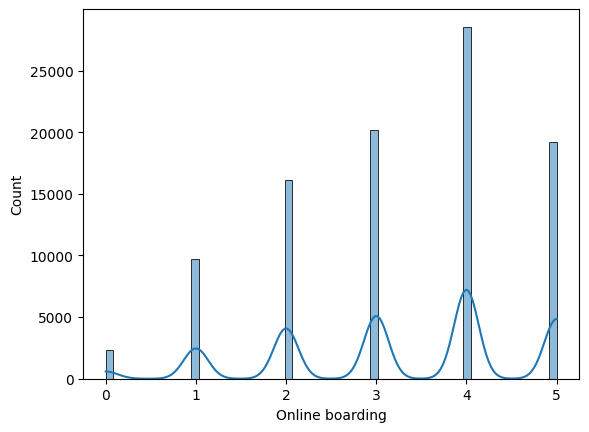

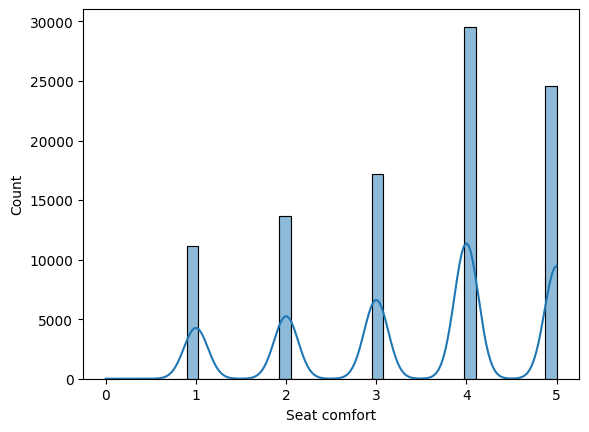

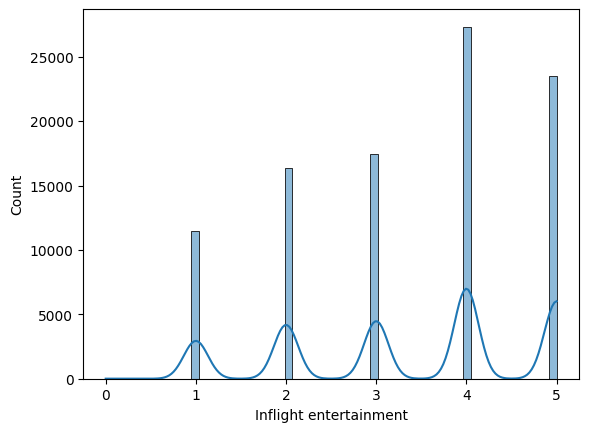

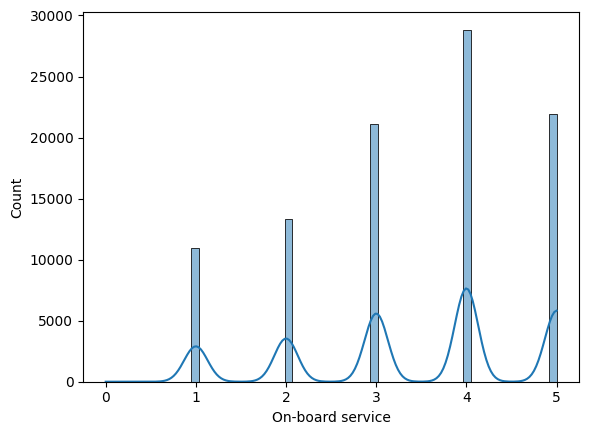

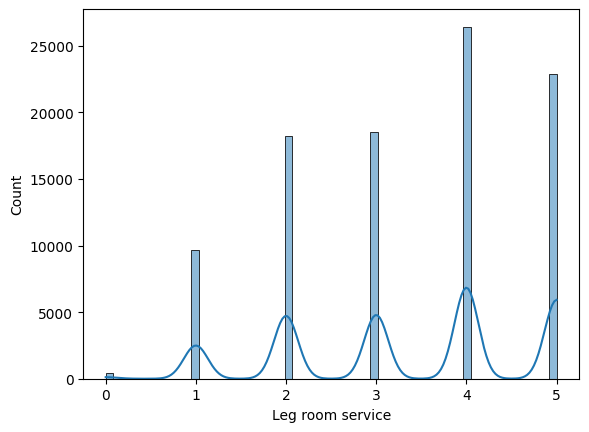

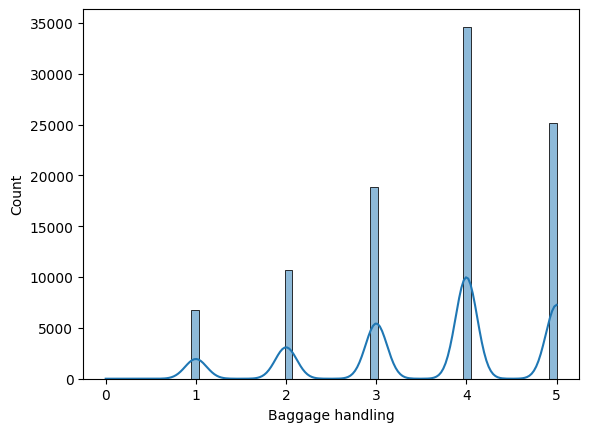

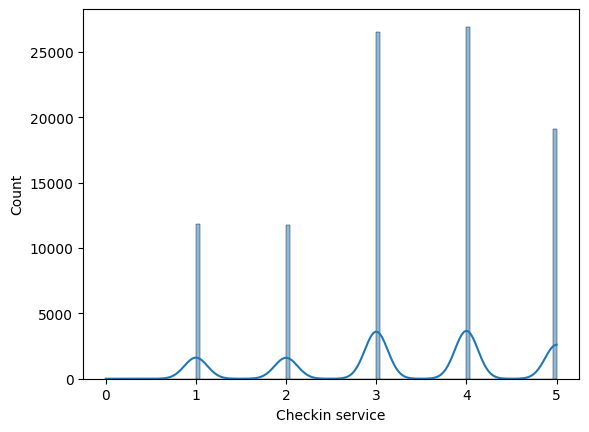

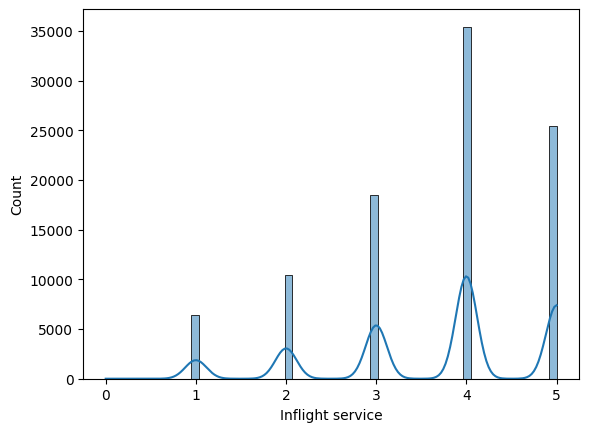

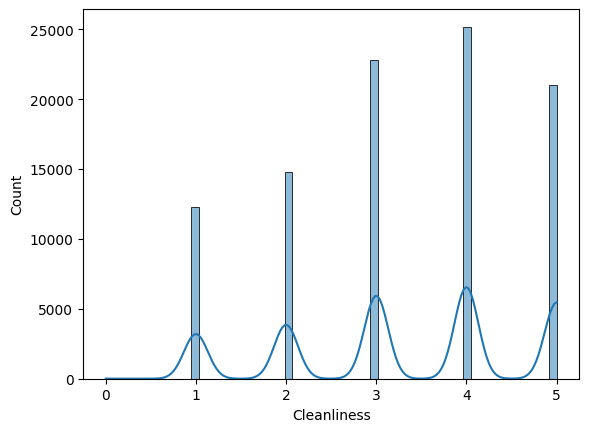

In [65]:
columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for col in columns:
    sns.histplot(df[col], kde=True)
    plt.show()

Машинное обучение. Предсказание оценки полета пассажира.



In [66]:
df

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129873,129874,Female,28.0,Loyal Customer,Personal Travel,Eco Plus,337.0,0.0,0.0,4.0,...,4.0,3.0,3.0,1.0,5.0,3.0,4.0,4.0,3.0,neutral or dissatisfied
129874,129875,Female,55.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,neutral or dissatisfied
129877,129878,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,neutral or dissatisfied
129878,129879,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,31.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,satisfied


In [67]:
X = df.drop(['id','satisfaction'], axis=1)

y = df['satisfaction']

In [68]:
X.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,...,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0
1,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,...,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
2,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,...,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0
3,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,...,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0
4,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,...,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0


In [69]:
df.columns

Index(['id', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction'],
      dtype='object')

In [70]:
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

In [71]:
num_features = ['Age','Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


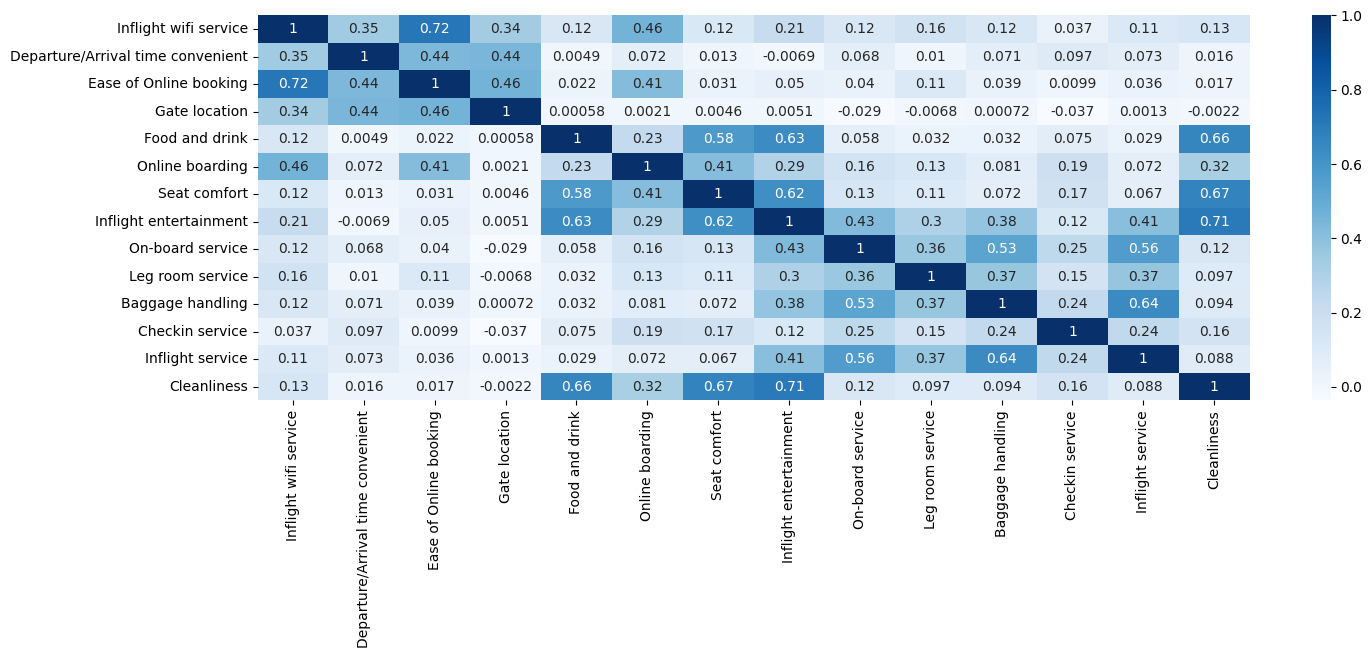

In [72]:
X['target'] = y
plt.figure(figsize = (16,5))
corr = X[cat_features].corr()
sns.heatmap(corr, cmap="Blues", annot=True)

X.drop('target', axis=1, inplace=True)

## Построение baseline


Для baseline-модели мы сделаем следующее:

* закодируем категориальные признаки при помощи TargetEncoder
* cмасштабируем все признаки с помощью StandardScaler
* обучим логистическую регрессию

In [73]:
y.value_counts()

neutral or dissatisfied    54089
satisfied                  42069
Name: satisfaction, dtype: int64

Заменим 1- довольных клиентов. 0 -отсальных.

In [74]:
y = y.replace({'satisfied' : 1, 'neutral or dissatisfied' : 0})

In [75]:
X.isna().sum()

Gender                                0
Age                                   0
Customer Type                        58
Type of Travel                       80
Class                                81
Flight Distance                      66
Departure Delay in Minutes            0
Arrival Delay in Minutes              0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
dtype: int64

In [76]:
X['Flight Distance'] = X['Flight Distance'].fillna(X['Flight Distance'].median())

In [77]:
print(df['Type of Travel'].value_counts())
X['Type of Travel'] = X['Type of Travel'].fillna('Business travel')

Business travel    66219
Personal Travel    29859
Name: Type of Travel, dtype: int64


In [78]:
print(df['Class'].value_counts())
X['Class'] = X['Class'].fillna('Business')

Business    46056
Eco         43118
Eco Plus     6903
Name: Class, dtype: int64


In [79]:
print(df['Customer Type'].value_counts())
X['Customer Type'] = X['Customer Type'].fillna('Loyal Customer')

Loyal Customer       78577
disloyal Customer    17523
Name: Customer Type, dtype: int64


In [80]:
X.isna().sum()

Gender                               0
Age                                  0
Customer Type                        0
Type of Travel                       0
Class                                0
Flight Distance                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=911)

In [82]:
p1 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_features)),
    ('scaler_', StandardScaler()),
    ('model_', LogisticRegression())
    ])
p1.fit(X_train, y_train)
pred = p1.predict(X_test)
print(classification_report(y_test, pred))
print(f"F1 Score: {f1_score(y_test, pred)}")
predicted_proba=p1.predict_proba(X_test)
print(f"roc_auc_score: {roc_auc_score(y_test, predicted_proba[:, 1])}")

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     13622
           1       0.92      0.91      0.91     10418

    accuracy                           0.93     24040
   macro avg       0.93      0.92      0.92     24040
weighted avg       0.93      0.93      0.93     24040

F1 Score: 0.9138714354760753
roc_auc_score: 0.9738827381056904


In [95]:
%%time
list_pipelines_ = []
mean_score_ = []
classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="rbf", random_state=911),
    LinearSVC(random_state=911),
    DecisionTreeClassifier(random_state=911),
    RandomForestClassifier(random_state=911),
    AdaBoostClassifier(random_state=911),
    GradientBoostingClassifier(random_state=911),
    CatBoostClassifier(random_seed=911,  verbose=False),
    lgb.LGBMClassifier(random_state=911),
    xgb.XGBClassifier(seed=911)

    ]
scalers = [StandardScaler(), MinMaxScaler(), MaxAbsScaler()]

for classifier in classifiers:
    for scaler in scalers:
        p2 = Pipeline([
            ('encoder_',TargetEncoder(cols=cat_features)),
             ('scaler_', scaler),
              ('model_', classifier)
              ])
        scores_ = cross_val_score(p2, X, y)
        print(scaler)
        print(classifier)
        print("model score: %.3f" % scores_.mean())
        print()
        mean_score_.append(scores_.mean())
        list_pipelines_.append(str(classifier) + str(scaler))

StandardScaler()
KNeighborsClassifier()
model score: 0.932

MinMaxScaler()
KNeighborsClassifier()
model score: 0.932

MaxAbsScaler()
KNeighborsClassifier()
model score: 0.936

StandardScaler()
SVC(random_state=911)
model score: 0.948

MinMaxScaler()
SVC(random_state=911)
model score: 0.947

MaxAbsScaler()
SVC(random_state=911)
model score: 0.941



Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


StandardScaler()
LinearSVC(random_state=911)
model score: 0.922

MinMaxScaler()
LinearSVC(random_state=911)
model score: 0.922

MaxAbsScaler()
LinearSVC(random_state=911)
model score: 0.922

StandardScaler()
DecisionTreeClassifier(random_state=911)
model score: 0.941

MinMaxScaler()
DecisionTreeClassifier(random_state=911)
model score: 0.940

MaxAbsScaler()
DecisionTreeClassifier(random_state=911)
model score: 0.940

StandardScaler()
RandomForestClassifier(random_state=911)
model score: 0.957

MinMaxScaler()
RandomForestClassifier(random_state=911)
model score: 0.957

MaxAbsScaler()
RandomForestClassifier(random_state=911)
model score: 0.957

StandardScaler()
AdaBoostClassifier(random_state=911)
model score: 0.925

MinMaxScaler()
AdaBoostClassifier(random_state=911)
model score: 0.925

MaxAbsScaler()
AdaBoostClassifier(random_state=911)
model score: 0.925

StandardScaler()
GradientBoostingClassifier(random_state=911)
model score: 0.940

MinMaxScaler()
GradientBoostingClassifier(random_

,0
KNeighborsClassifier()StandardScaler(),0.931717
KNeighborsClassifier()MinMaxScaler(),0.932424
KNeighborsClassifier()MaxAbsScaler(),0.936241
SVC(random_state=911)StandardScaler(),0.948086
SVC(random_state=911)MinMaxScaler(),0.946640
SVC(random_state=911)MaxAbsScaler(),0.940640
LinearSVC(random_state=911)StandardScaler(),0.922461
LinearSVC(random_state=911)MinMaxScaler(),0.922482
LinearSVC(random_state=911)MaxAbsScaler(),0.922336
DecisionTreeClassifier(random_state=911)StandardScaler(),0.940515


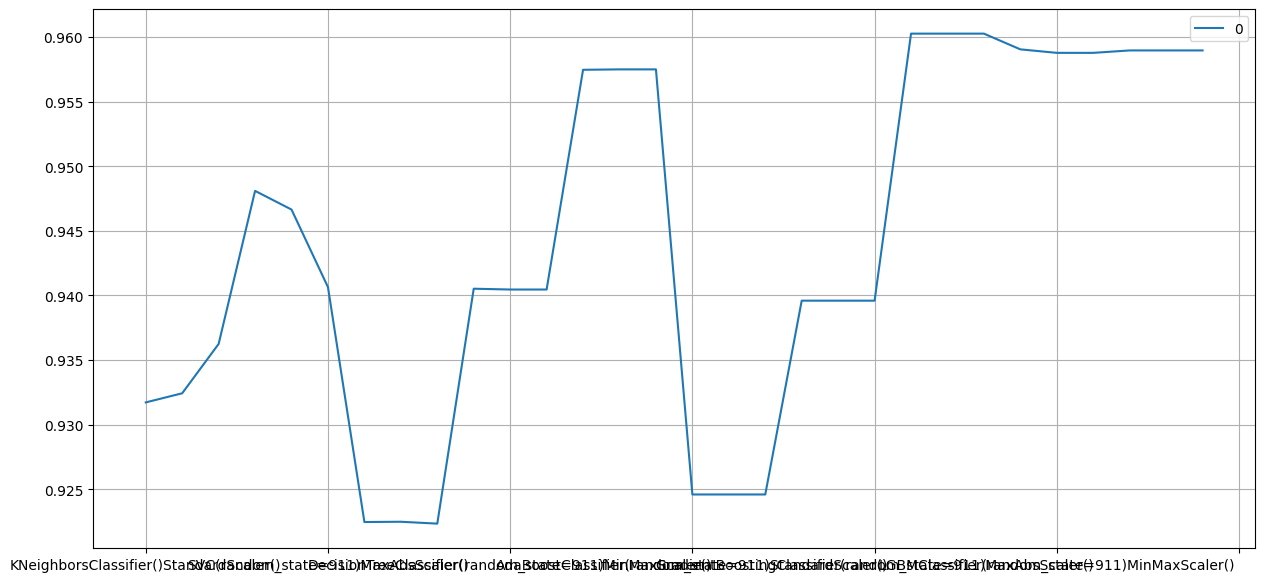

In [96]:
results=pd.DataFrame(data=mean_score_,index=list_pipelines_)
results.plot(figsize=(15,7))
plt.grid()
results

In [97]:
max_value = max(mean_score_)
max_index = mean_score_. index(max_value)
max_index
results.iloc[max_index]

0    0.960253
Name: <catboost.core.CatBoostClassifier object at 0x7fda378a4310>StandardScaler(), dtype: float64

**Точная настройка модели с подбором гипер-параметров**

In [102]:
p3 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_features)),
     ('scaler_', StandardScaler()),
      ('model', CatBoostClassifier(random_seed=911,  verbose=False))
              ])
param_grid = {'model__learning_rate' : [0.01,0.1,0.001,0.0001],
              'model__depth': [4, 6, 10],
              'model__l2_leaf_reg': [1, 3, 5, 7, 9]}
grid = GridSearchCV(p3, param_grid)
grid.fit(X_train, y_train)
model = grid.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")
predicted_proba=model.predict_proba(X_test)
print(f"roc_auc_score: {roc_auc_score(y_test, predicted_proba[:, 1])}")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     13622
           1       0.97      0.94      0.96     10418

    accuracy                           0.96     24040
   macro avg       0.96      0.96      0.96     24040
weighted avg       0.96      0.96      0.96     24040

F1 Score: 0.9564368993609444
roc_auc_score: 0.9950739319608758
